# Volatility Prediction for S&P 500 Index


## Table of Contents:
1) Installing & Importing Packages
2) Downloading & Reading Data
3) Exploratory Data Analysis
4) Data Preprocessing
5) Feature Extraction
6) Modeling & Evaluation
7) Conclusion


### 1.a Installing Needed Packages

You might need to restart the kernel after installing them

In [2]:
# ! pip install ipywidgets
# ! pip install pandas-profiling
# ! pip install yfinance
# !pip install skforecast
# !pip install arch

### 1.b Importing Needed libraries

In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
from pandas_profiling import ProfileReport
from ipywidgets import widgets
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from skforecast.ForecasterAutoreg import ForecasterAutoreg
import arch
from arch import arch_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

c:\users\elsher\documents\hackathon\venv\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


### 2. Downloading & Reading Datasets
- Downloading datasets from yahoo finance and reading the rest (which were previously downloaded from Fred as csv files).
- Adjusting the needed columns types from the datasets and choosing the final columns to be used (Adj_Close).
- Defining the set of rows that we will include in our analysis (Dates from 1/1/1990 till 2/11/2022) 
- Merging all datasets to form the final **df** which will be the dataset used in our prediction.

In [4]:
# Treasury Yield 10 Years (^TNX)
TNX = yf.download("^TNX", start='1990-01-01')
TNX.to_csv('TNX.csv')
TNX = pd.read_csv('TNX.csv')
TNX['Date'] = pd.to_datetime(TNX['Date'])
TNX = TNX[['Date', 'Adj Close']]
TNX.columns = ['Date', 'TNX_Close']
TNX = TNX[(TNX['Date']>='1990-01-01') &(TNX['Date']<='2022-11-02')]

[*********************100%***********************]  1 of 1 completed


In [5]:
# HANG SENG INDEX (^HSI)
HSI = yf.download("^HSI", start='1990-01-01')
HSI.to_csv('HSI.csv')
HSI = pd.read_csv('HSI.csv')
HSI['Date'] = pd.to_datetime(HSI['Date'])
HSI = HSI[['Date', 'Adj Close']]
HSI.columns = ['Date', 'HSI_Close']
HSI = HSI[(HSI['Date']>='1990-01-01') &(HSI['Date']<='2022-11-02')]

[*********************100%***********************]  1 of 1 completed


In [6]:
# KOSPI Composite Index (^KS11)
VKOSPI = yf.download("^KS11", start='1990-01-01')
VKOSPI.to_csv('VKOSPI.csv')
VKOSPI = pd.read_csv('VKOSPI.csv')
VKOSPI['Date'] = pd.to_datetime(VKOSPI['Date'])
VKOSPI = VKOSPI[['Date', 'Adj Close']]
VKOSPI.columns = ['Date', 'VKOSPI_Close']
VKOSPI = VKOSPI[(VKOSPI['Date']>='1990-01-01') &(VKOSPI['Date']<='2022-11-02')]

[*********************100%***********************]  1 of 1 completed


In [7]:
# S&P 500 (^GSPC)
GSPC = yf.download("^GSPC", start='1990-01-01')
GSPC.to_csv('GSPC.csv')
GSPC = pd.read_csv('GSPC.csv')
GSPC['Date'] = pd.to_datetime(GSPC['Date'])
GSPC = GSPC[['Date', 'Adj Close']]
GSPC.columns = ['Date', 'GSPC_Close']
GSPC = GSPC[(GSPC['Date']>='1990-01-01') &(GSPC['Date']<='2022-11-02')]

[*********************100%***********************]  1 of 1 completed


In [8]:
# S&P-GSCI Commodity Index Future
GSCI = yf.download("^SPGSCI", start='1990-01-01')
GSCI.to_csv('GSCI.csv')
GSCI = pd.read_csv('GSCI.csv')
GSCI['Date'] = pd.to_datetime(GSCI['Date'])
GSCI = GSCI[['Date', 'Adj Close']]
GSCI.columns = ['Date', 'GSCI_Close']
GSCI = GSCI[(GSCI['Date']>='1990-01-01') &(GSCI['Date']<='2022-11-02')]

[*********************100%***********************]  1 of 1 completed


In [9]:
# CBOE Volatility Index (^VIX)
VIX = yf.download("^VIX", start='1990-01-01')
VIX.to_csv('VIX.csv')
VIX = pd.read_csv('VIX.csv')
VIX['Date'] = pd.to_datetime(VIX['Date'])
VIX = VIX[['Date', 'Adj Close']]
VIX.columns = ['Date', 'VIX_Close']
VIX = VIX[(VIX['Date']>='1990-01-01') &(VIX['Date']<='2022-11-02')]

[*********************100%***********************]  1 of 1 completed


In [10]:
# CPI Data was downloaded from the Fred's website
# URL: https://fred.stlouisfed.org/series/CPIAUCSL
CPI = pd.read_csv('CPI Data.csv')
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI.columns = ['Date', 'CPI_Close']
CPI = CPI[(CPI['Date']>='1990-01-01') &(CPI['Date']<='2022-11-02')]

In [11]:
# US Dollar/USDX - Index - Cash (DX-Y.NYB)
doll_ind = yf.download("DX-Y.NYB", start='1990-01-01')
doll_ind.to_csv('Dollar Index.csv')
doll_ind = pd.read_csv('Dollar Index.csv')
doll_ind['Date'] = pd.to_datetime(doll_ind['Date'])
doll_ind = doll_ind[['Date', 'Adj Close']]
doll_ind.columns = ['Date', 'Dollar_Close']
doll_ind = doll_ind[(doll_ind['Date']>='1990-01-01') &(doll_ind['Date']<='2022-11-02')]

[*********************100%***********************]  1 of 1 completed


In [12]:
# GDP Data was downloaded from the Fred's website
# URL: https://fred.stlouisfed.org/series/GDP
GDP = pd.read_csv('GDP.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP.columns = ['Date', 'GDP_Close']
GDP = GDP[(GDP['Date']>='1990-01-01') &(GDP['Date']<='2022-11-02')]

In [13]:
# Economic Policy Uncertainty Index for United States Data was downloaded from the Fred's website
# URL: https://fred.stlouisfed.org/series/USEPUINDXD
EPU = pd.read_csv('EPU.csv')
EPU['DATE'] = pd.to_datetime(EPU['DATE'])
EPU.columns = ['Date', 'EPU_Close']
EPU = EPU[(EPU['Date']>='1990-01-01') &(EPU['Date']<='2022-11-02')]

#### Merging all data into the final dataset

In [14]:
df = pd.merge(VIX, TNX,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, doll_ind,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, CPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GDP,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSCI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, EPU,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, GSPC,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, VKOSPI,  how='left', left_on=['Date'], right_on = ['Date'])
df = pd.merge(df, HSI,  how='left', left_on=['Date'], right_on = ['Date'])
df['Date'] = pd.to_datetime(df['Date'])

#### Checking the shape of the dataset by viewing the first five rows

In [15]:
df.head()

,Date,VIX_Close,TNX_Close,Dollar_Close,CPI_Close,GDP_Close,GSCI_Close,EPU_Close,GSPC_Close,VKOSPI_Close,HSI_Close
0,1990-01-02,17.240000,7.94,94.290001,NaN,NaN,212.089996,169.23,359.690002,NaN,2838.100098
1,1990-01-03,18.190001,7.99,94.419998,NaN,NaN,215.639999,59.10,358.760010,NaN,2858.699951
2,1990-01-04,19.219999,7.98,92.519997,NaN,NaN,212.139999,76.38,355.670013,NaN,2868.000000
3,1990-01-05,20.110001,7.99,92.849998,NaN,NaN,206.919998,57.82,352.200012,NaN,2839.899902
4,1990-01-08,20.260000,8.02,92.050003,NaN,NaN,199.750000,126.54,353.790009,NaN,2816.000000


#### Checking dataset in depth information including: number of columns, number of rows, columns names and datatypes, dataset index and missing values count in each column.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8275 entries, 0 to 8274
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8275 non-null   datetime64[ns]
 1   VIX_Close     8275 non-null   float64       
 2   TNX_Close     8243 non-null   float64       
 3   Dollar_Close  8273 non-null   float64       
 4   CPI_Close     253 non-null    float64       
 5   GDP_Close     71 non-null     float64       
 6   GSCI_Close    8274 non-null   float64       
 7   EPU_Close     8275 non-null   float64       
 8   GSPC_Close    8275 non-null   float64       
 9   VKOSPI_Close  6186 non-null   float64       
 10  HSI_Close     7912 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 775.8 KB


### 3. Exploratory Data Analysis
- Profile Reporting: Containing information about features: statistics and number of missing values, etc.. It also contains plots about distributions, interaction and correlation between features.
- Correlation between features and target variable.
- Time Series Plots for each feature

#### a) Profile Reporting

We create the report and can view it in the notebook using (*profile.to_notebook_iframe()*). We commented this line to save space in the notebook, however, an html view of the report can be found in the saved html file (*EDA Report*)

In [17]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [18]:
# profile.to_notebook_iframe()

In [19]:
profile.to_file("EDA Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Observations based on EDA Report:
- CPI & GDP have around 90% missing values, this is due to the fact that they are updated monthly and not daily, therefore we will deal with them in the Pre-processing section. 
- CPI & GDP are highly positively correlated, which might lead to collinearity. Meaning that, we can identify the pattern of one of them based on the other. This means that we can only use one of them to help in predicting the VIX.
- TNX is highly negatively correlated with CPI & GDP, which also leads to the collinearity issue mentioned in the previous point.

#### b) Correlation of all features with VIX 

We check the correlation between all features with the VIX, to formulate an initial hypothesis of which features might have the highest importance in predicting the VIX.

In [20]:
df.corrwith(df["VIX_Close"]).sort_values(ascending=False)

VIX_Close       1.000000
EPU_Close       0.401285
Dollar_Close    0.162437
CPI_Close       0.082701
GDP_Close       0.047083
GSPC_Close     -0.001798
GSCI_Close     -0.031642
TNX_Close      -0.087714
HSI_Close      -0.091124
VKOSPI_Close   -0.261978
dtype: float64

#### Observations based on Correlation with VIX:
- The highest positive correlation to the VIX is the EPU index. We will observe after fitting the multivariate model if it has high importance in predicting the VIX.

#### c) Time Series Plots for all features

We create a function that takes the dataframe, date column, column that we intend to graph, title and axes labels.

In [21]:
# defining function for plotting
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    sns.lineplot(data=df,x=x, y=y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


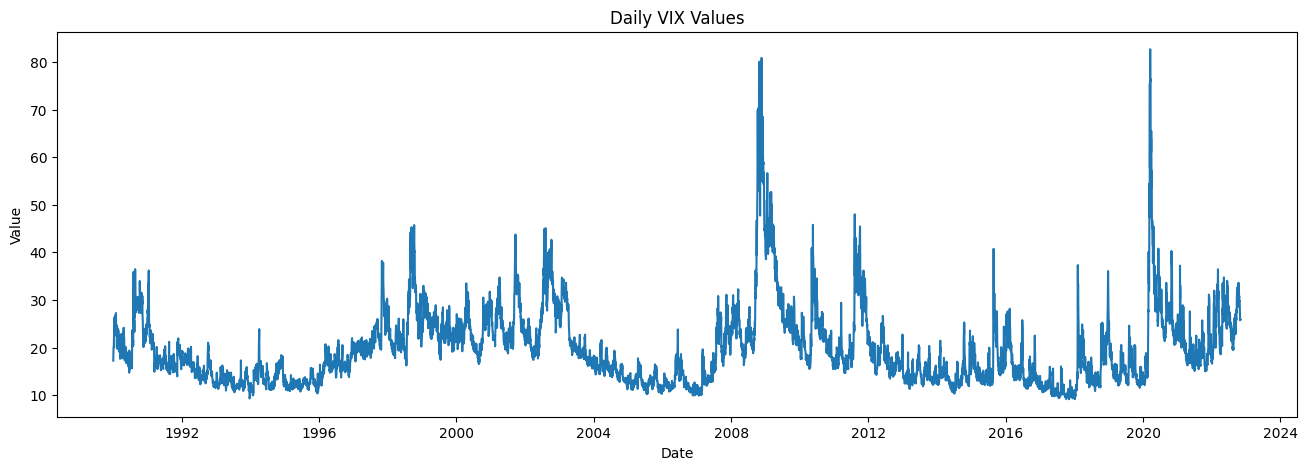

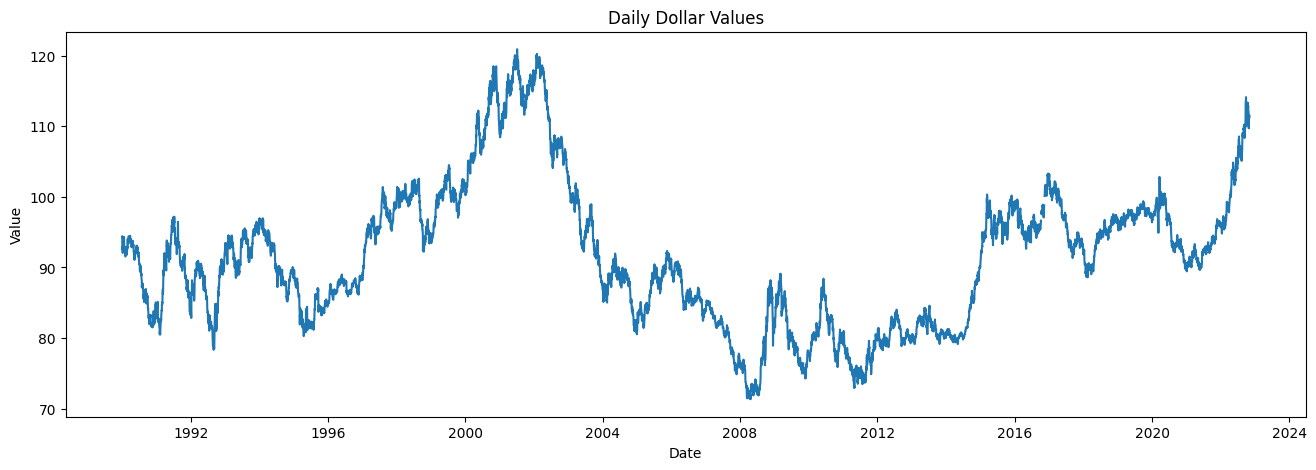

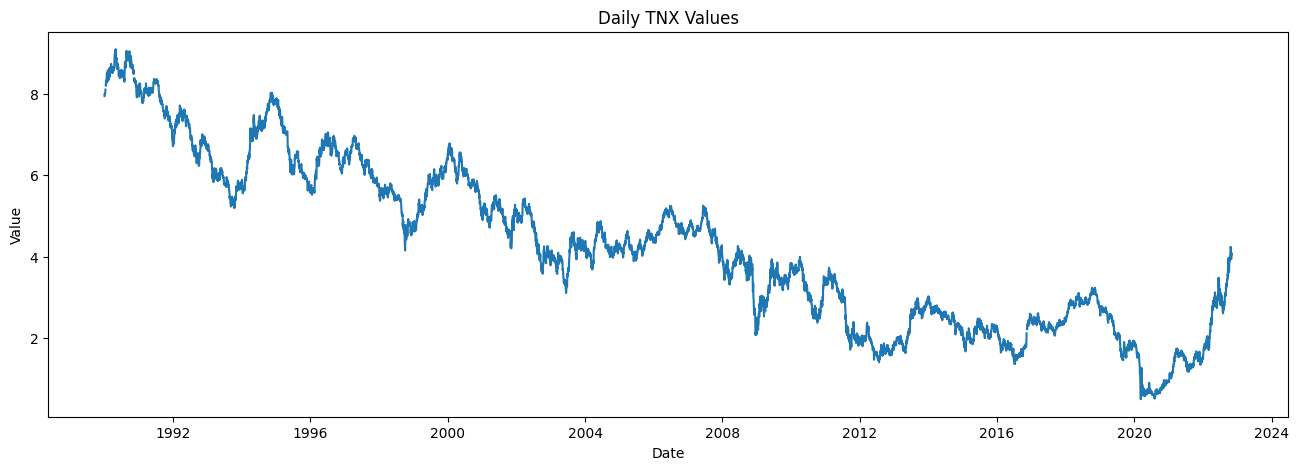

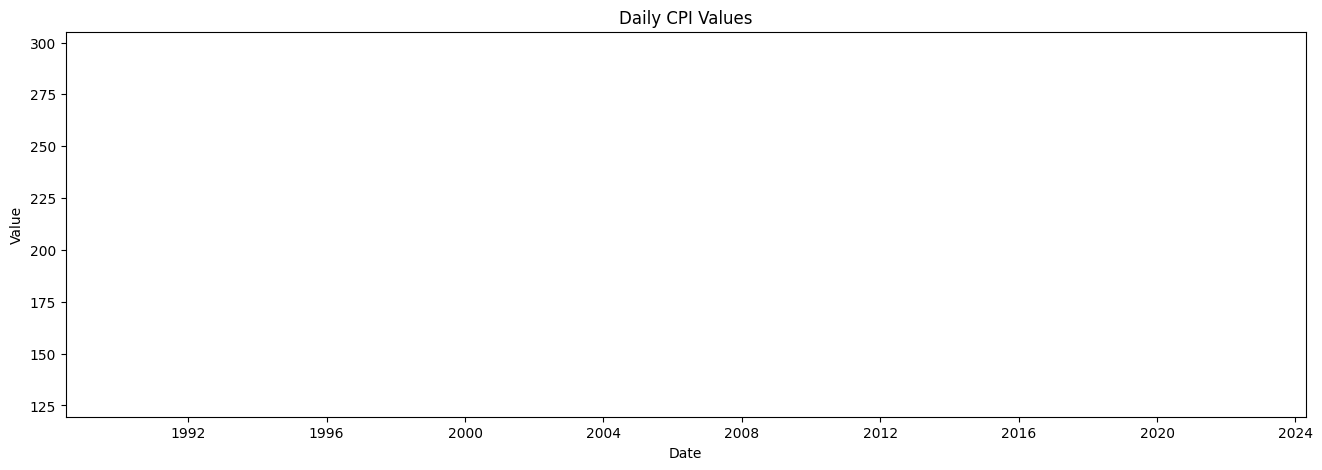

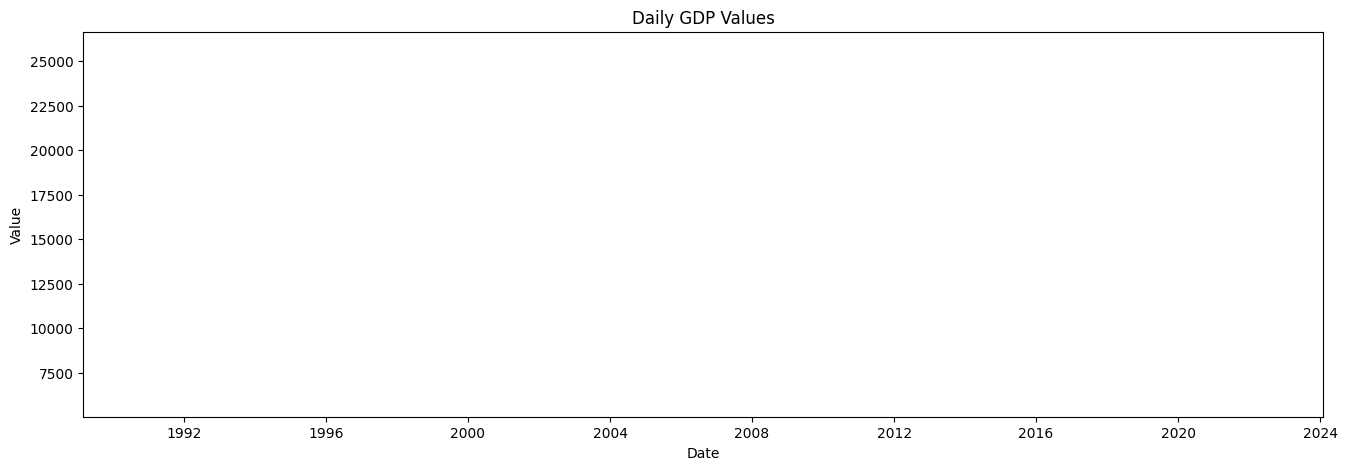

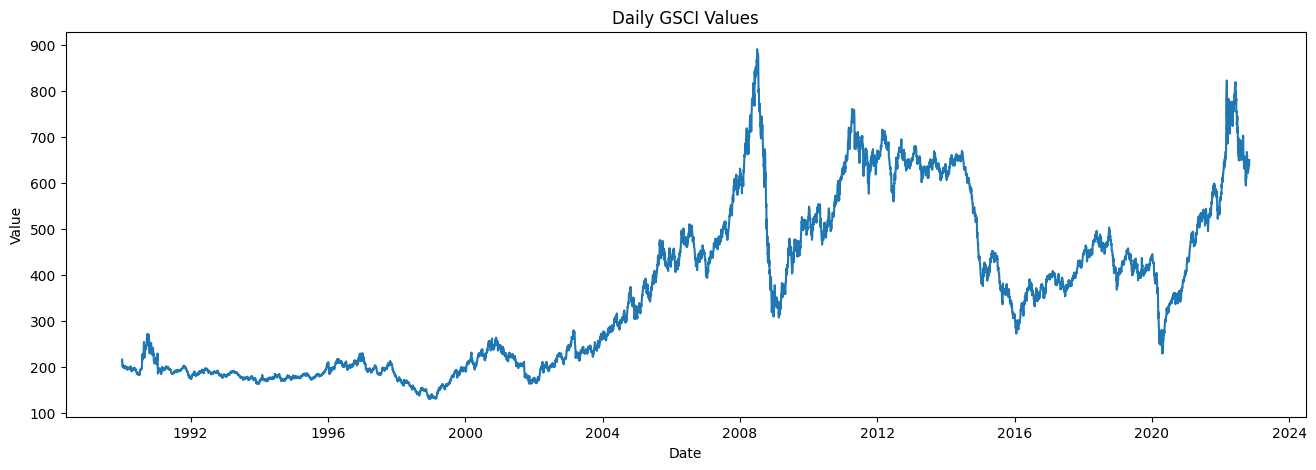

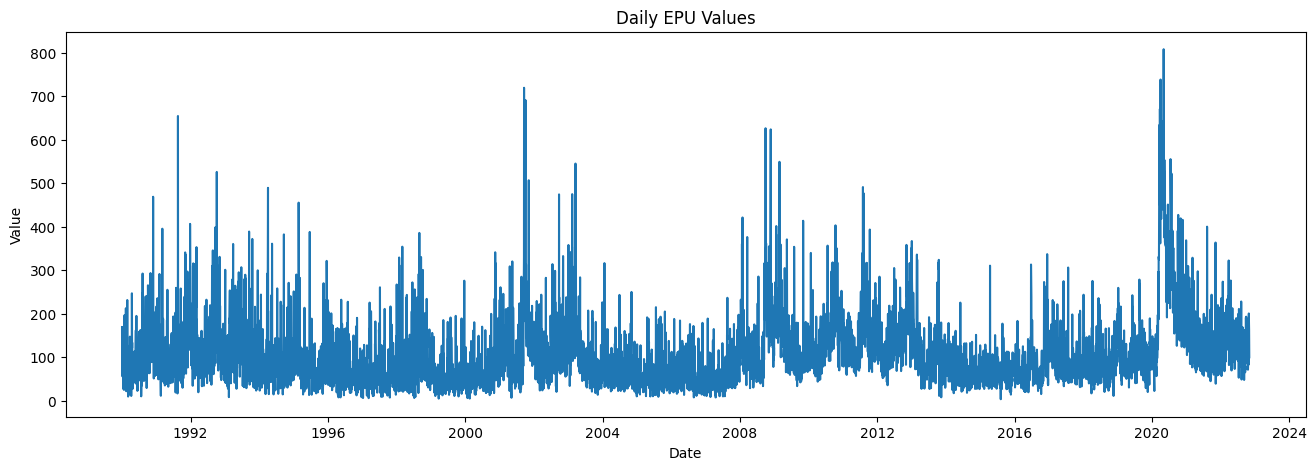

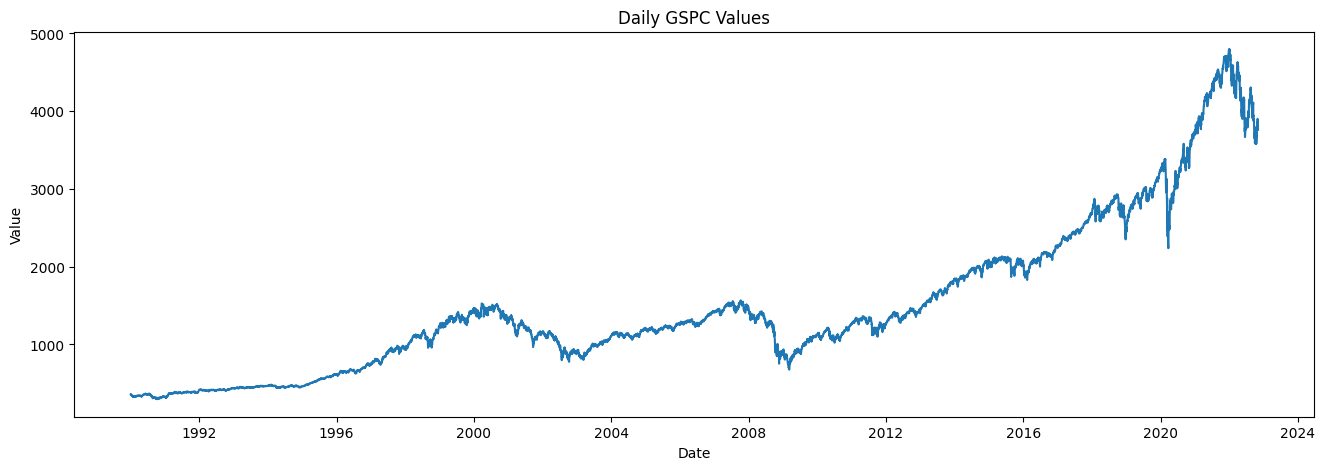

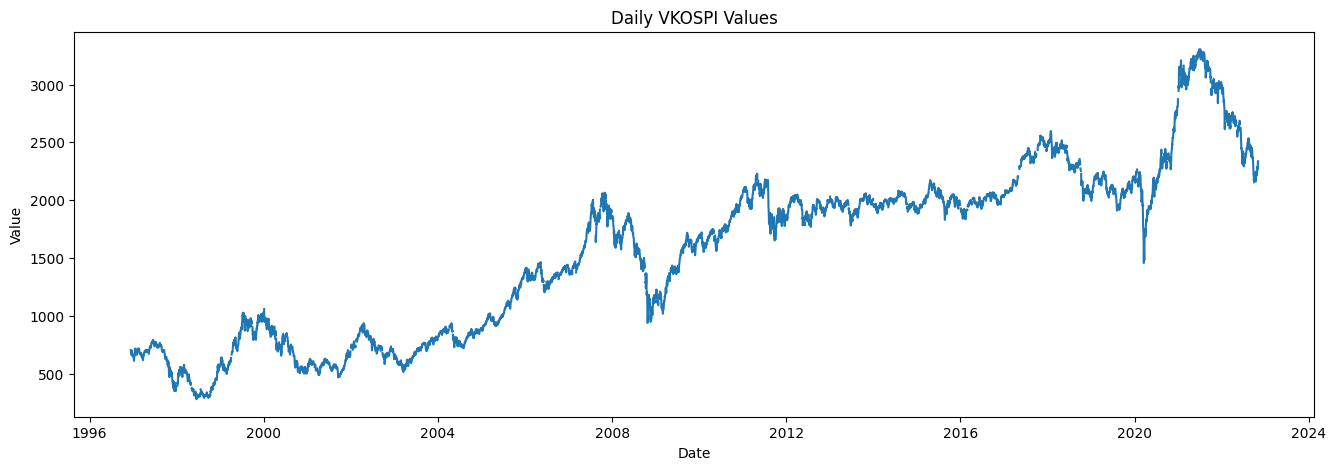

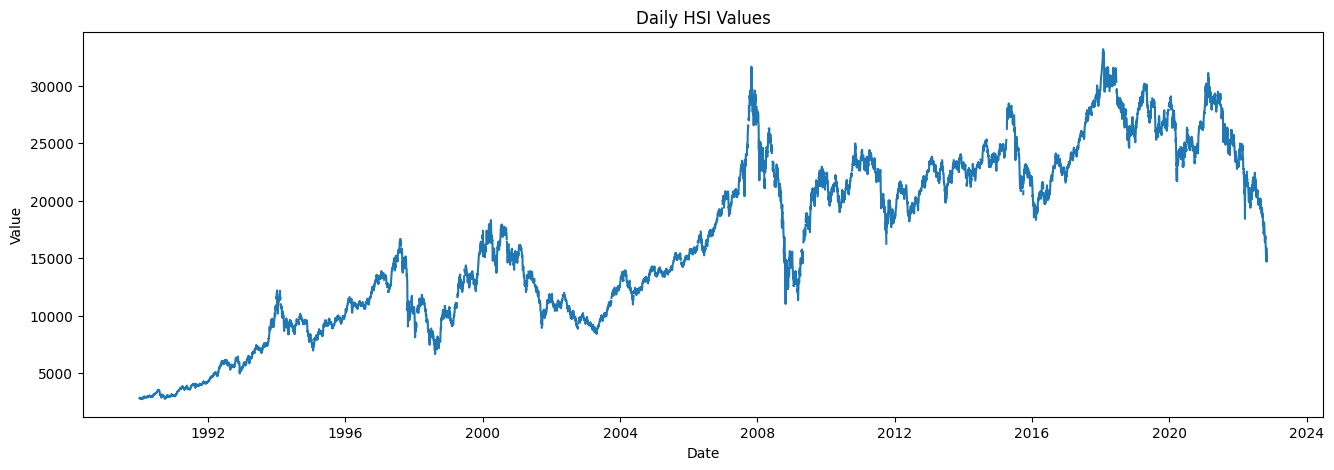

In [22]:
plot_df(df, 'Date', 'VIX_Close', title="Daily VIX Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'Dollar_Close', title="Daily Dollar Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'TNX_Close', title="Daily TNX Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'CPI_Close', title="Daily CPI Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'GDP_Close', title="Daily GDP Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'GSCI_Close', title="Daily GSCI Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'EPU_Close', title="Daily EPU Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'GSPC_Close', title="Daily GSPC Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'VKOSPI_Close', title="Daily VKOSPI Values", xlabel='Date', ylabel='Value')
plot_df(df, 'Date', 'HSI_Close', title="Daily HSI Values", xlabel='Date', ylabel='Value')

#### Observations from Time Series Plots:
- We can observe that graphs for CPI and GDP data are empty and that's because we are graphing daily data while they are generated monthly and therefore they have a lot of missing data points. This will be handled in the next section.

### 4. Data Preprocessing
- Dealing with missing timestamps
- Dealing with missing data


#### a. Dealing with missing timestamps

Since our objective is to predict daily volatility values, we need our dataset to have a daily frequency. We will adjust it by adding the missing days as dates and then fill thei missing values with the existing missing values.

In [23]:
new_df = df
new_df.index = new_df['Date']
new_df = new_df.asfreq("D")
new_df.drop(columns='Date', inplace=True)
new_df.head()

,VIX_Close,TNX_Close,Dollar_Close,CPI_Close,GDP_Close,GSCI_Close,EPU_Close,GSPC_Close,VKOSPI_Close,HSI_Close
Date,,,,,,,,,,
1990-01-02,17.240000,7.94,94.290001,NaN,NaN,212.089996,169.23,359.690002,NaN,2838.100098
1990-01-03,18.190001,7.99,94.419998,NaN,NaN,215.639999,59.10,358.760010,NaN,2858.699951
1990-01-04,19.219999,7.98,92.519997,NaN,NaN,212.139999,76.38,355.670013,NaN,2868.000000
1990-01-05,20.110001,7.99,92.849998,NaN,NaN,206.919998,57.82,352.200012,NaN,2839.899902
1990-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### b. Dealing with missing data

Since we are dealing with time series data, based on our research on dealing with missing data in time series data, we decided to use both the forward fill and the backward fill respectively. This is due to the fact that usually time series data depend on previous values and therefore the consecutive values can be close to each other, rather than just filling the missing values with the mean or median of the whole dataset. Especially, that our dataset timeframe is very wide and contains extreme values at certain point, so it doesn't make sense in our case to fill the missing values using the mean or median. 

In [24]:
## 1st phase of filling missing values using forward fill
new_df.ffill(inplace=True)

## 2nd phase of filling missing values using backward fill
new_df.bfill(inplace=True)

#### Checking whether we still have more missing values

In [25]:
new_df.isna().sum()

VIX_Close       0
TNX_Close       0
Dollar_Close    0
CPI_Close       0
GDP_Close       0
GSCI_Close      0
EPU_Close       0
GSPC_Close      0
VKOSPI_Close    0
HSI_Close       0
dtype: int64

### 5. Feature Extraction
- Date-related features
- Rolling features

#### a) Date- related Features:

We will be extracting features from our date variable, that might be of importance in the predictibility of the VIX.

In [26]:
new_df['year']=new_df.index.year 
new_df['month']=new_df.index.month 
new_df['day']=new_df.index.day
new_df['dayofweek']=new_df.index.weekday
new_df['weekofyear']=new_df.index.weekofyear
new_df['quarter']=new_df.index.quarter
new_df['month_start']=new_df.index.is_month_start
new_df['month_end']=new_df.index.is_month_end
new_df['quarter_start']=new_df.index.is_quarter_start
new_df['quarter_end']=new_df.index.is_quarter_end
new_df['year_start']=new_df.index.is_year_start
new_df['year_end']=new_df.index.is_year_end
new_df['leap_year']=new_df.index.is_leap_year

In [27]:
new_df.shape

(11993, 23)

#### b) Rolling Features

Creating a function that takes a column in a dataframe and adds new features that represent previous week's mean, minimum, maximum and standard deviation. 

In [28]:
def one_week_rolling_feature_extratror(data, col):
    ''' Returns dataframe appended with additional features: last week average, maximum, minimum & std'''
    data[col+'_prev_week_mean'] = data[col].rolling(window=7).mean()
    data[col+'_prev_week_max'] = data[col].rolling(window=7).max()
    data[col+'_prev_week_min'] = data[col].rolling(window=7).min()
    data[col+'_prev_week_std'] = data[col].rolling(window=7).std()
    return data

In [29]:
columns = ['TNX_Close','Dollar_Close','CPI_Close','GDP_Close','GSCI_Close','EPU_Close','GSPC_Close','VKOSPI_Close','HSI_Close']
for col in columns:
    new_df = one_week_rolling_feature_extratror(new_df, col)

In [30]:
new_df.shape

(11993, 59)

#### Checking for missing values after adding the new features

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11993 entries, 1990-01-02 to 2022-11-02
Freq: D
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VIX_Close                    11993 non-null  float64
 1   TNX_Close                    11993 non-null  float64
 2   Dollar_Close                 11993 non-null  float64
 3   CPI_Close                    11993 non-null  float64
 4   GDP_Close                    11993 non-null  float64
 5   GSCI_Close                   11993 non-null  float64
 6   EPU_Close                    11993 non-null  float64
 7   GSPC_Close                   11993 non-null  float64
 8   VKOSPI_Close                 11993 non-null  float64
 9   HSI_Close                    11993 non-null  float64
 10  year                         11993 non-null  int64  
 11  month                        11993 non-null  int64  
 12  day                          11993 non-null  int6

#### Filling missing values with backward fill method

In [32]:
new_df = new_df.bfill()
new_df.isna().sum()

VIX_Close                      0
TNX_Close                      0
Dollar_Close                   0
CPI_Close                      0
GDP_Close                      0
GSCI_Close                     0
EPU_Close                      0
GSPC_Close                     0
VKOSPI_Close                   0
HSI_Close                      0
year                           0
month                          0
day                            0
dayofweek                      0
weekofyear                     0
quarter                        0
month_start                    0
month_end                      0
quarter_start                  0
quarter_end                    0
year_start                     0
year_end                       0
leap_year                      0
TNX_Close_prev_week_mean       0
TNX_Close_prev_week_max        0
TNX_Close_prev_week_min        0
TNX_Close_prev_week_std        0
Dollar_Close_prev_week_mean    0
Dollar_Close_prev_week_max     0
Dollar_Close_prev_week_min     0
Dollar_Clo

#### Plotting ACF and PACF for VIX

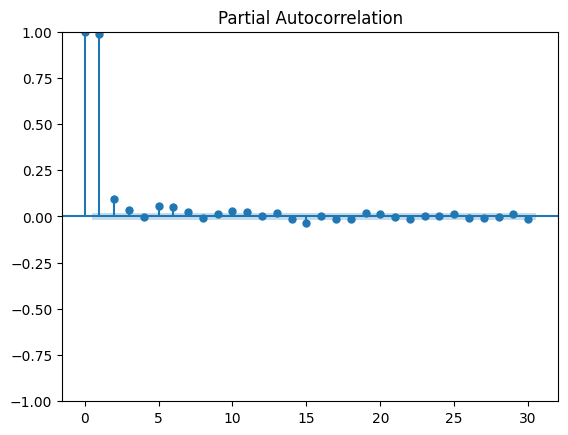

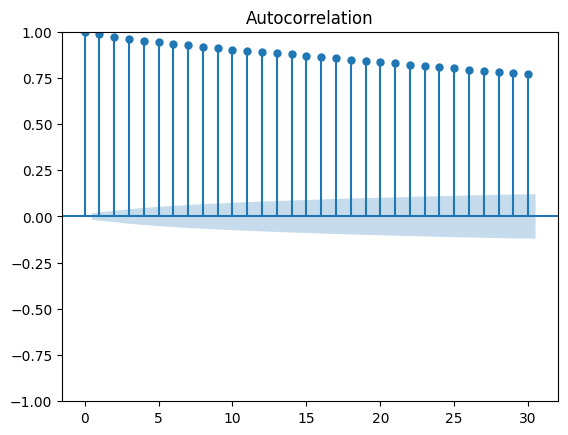

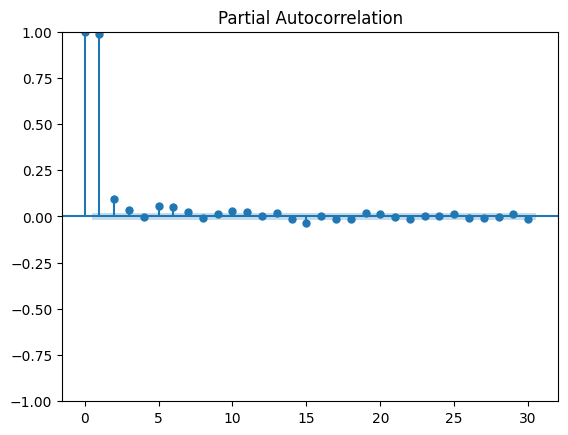

In [33]:
plot_acf(new_df.VIX_Close.tolist(), lags=30)
plot_pacf(new_df.VIX_Close.tolist(), lags=30)

##### Observations based on ACF and PACF:
Based on ACF and PACF plots, we can see that the first lag has a very high correlation to the current VIX values. Lag 2 has also correlation, however not a large one like the first lag. After that, we can see a decreasing correlation to further lags.

#### Saving the final dataset with additional features

In [34]:
new_df.to_csv('Final Data with Features.csv')

#### Steps needed when reading directly the data from (*Final Data with Features.csv") file

In [35]:
new_df=pd.read_csv('Final Data with Features.csv')
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.index = new_df.Date
new_df = new_df.asfreq("D")
new_df.head()

,Date,VIX_Close,TNX_Close,Dollar_Close,CPI_Close,GDP_Close,GSCI_Close,EPU_Close,GSPC_Close,VKOSPI_Close,...,GSPC_Close_prev_week_min,GSPC_Close_prev_week_std,VKOSPI_Close_prev_week_mean,VKOSPI_Close_prev_week_max,VKOSPI_Close_prev_week_min,VKOSPI_Close_prev_week_std,HSI_Close_prev_week_mean,HSI_Close_prev_week_max,HSI_Close_prev_week_min,HSI_Close_prev_week_std
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,1990-01-02,17.240000,7.94,94.290001,128.0,6004.733,212.089996,169.23,359.690002,704.679993,...,352.200012,3.202403,704.679993,704.679993,704.679993,0.0,2842.928537,2868.0,2816.0,16.599667
1990-01-03,1990-01-03,18.190001,7.99,94.419998,128.0,6004.733,215.639999,59.10,358.760010,704.679993,...,352.200012,3.202403,704.679993,704.679993,704.679993,0.0,2842.928537,2868.0,2816.0,16.599667
1990-01-04,1990-01-04,19.219999,7.98,92.519997,128.0,6004.733,212.139999,76.38,355.670013,704.679993,...,352.200012,3.202403,704.679993,704.679993,704.679993,0.0,2842.928537,2868.0,2816.0,16.599667
1990-01-05,1990-01-05,20.110001,7.99,92.849998,128.0,6004.733,206.919998,57.82,352.200012,704.679993,...,352.200012,3.202403,704.679993,704.679993,704.679993,0.0,2842.928537,2868.0,2816.0,16.599667
1990-01-06,1990-01-06,20.110001,7.99,92.849998,128.0,6004.733,206.919998,57.82,352.200012,704.679993,...,352.200012,3.202403,704.679993,704.679993,704.679993,0.0,2842.928537,2868.0,2816.0,16.599667


### 6. Modeling:

- Splitting data to train and test
- Univariate Machine Learning models
- Multvariate Machine Learning models
- Univariate Volatility models

In our machine learning models, we used the **ForecasterAutoreg** from **Skforecast** library. Based on the documentation of the model: *This class turns any regressor compatible with the scikit-learn API into a recursive autoregressive (multi-step) forecaster.* 

We input the sklearn model to be used and the lag value, in our case we used the lag of 365 days to check whether last year volatility has high effect on today's volatility. 

For the multivariate case, we add our added and extracted features as exogenous variables and see their importance. Please note that we can only generate feature importances for the random forest model only and not the SVR since it already has *feature_importances_* part of its attributes, unlike SVR. 


#### a) Splitting data to train and test

We decided to train the data on the first 31 years of data, and test on the last 10 months of data (since beginning of January 2022 till beginning of November 2022)

In [36]:
train=new_df.loc['1990-01-03':'2021-12-31'] 
test=new_df.loc['2022-01-01':'2022-11-02'] 

print("Training data shape =", train.shape, "\nTesting data shape =", test.shape)

Training data shape = (11686, 60) 
Testing data shape = (306, 60)


#### Plotting training and testing data

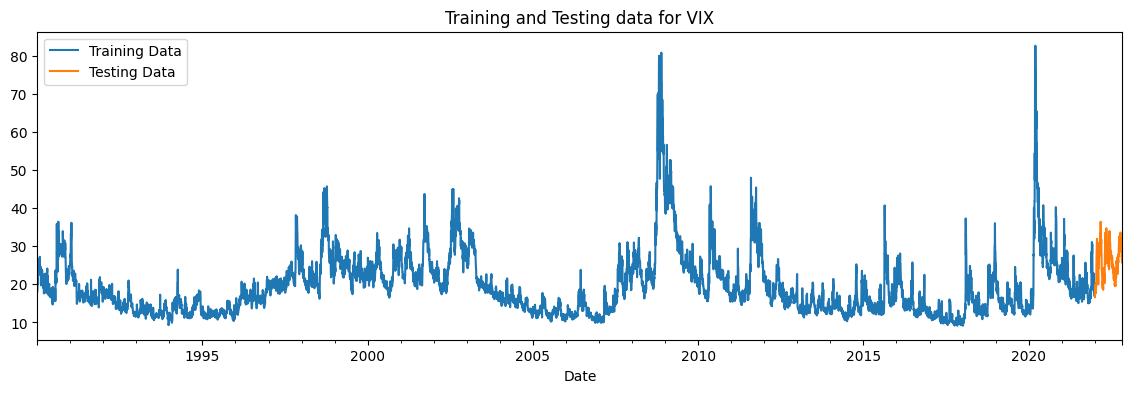

In [37]:
fig, ax=plt.subplots(figsize=(14, 4))
train['VIX_Close'].plot(ax=ax, label='Training Data')
test['VIX_Close'].plot(ax=ax, label='Testing Data')
plt.title("Training and Testing data for VIX")
ax.legend();

#### b) Univariate Modeling 

**1. Univariate Time Series Using Random Forest**

##### Create and train forecaster for univariate time series using Random Forest Regressor


In [38]:
rf_uni = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 365
             )

rf_uni.fit(y=train['VIX_Close'])
rf_uni

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 22

##### Calculating Predictions

In [39]:
predictions = rf_uni.predict(steps=len(test))
predictions.head()

2022-01-01    17.1366
2022-01-02    17.2551
2022-01-03    17.4499
2022-01-04    17.4316
2022-01-05    17.4625
Freq: D, Name: pred, dtype: float64

##### Plotting Actual Vs Predicted

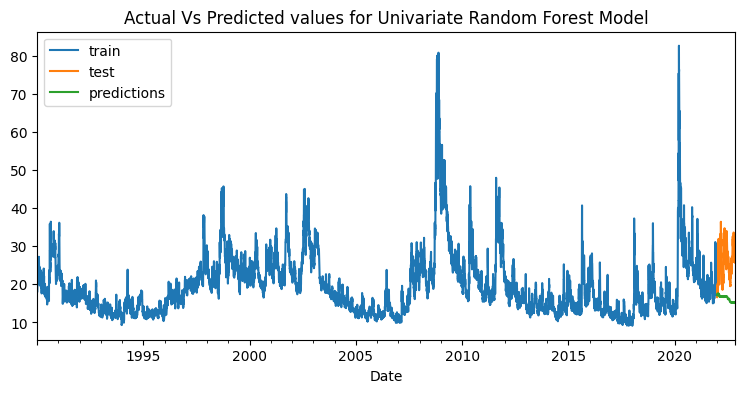

In [40]:
fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
plt.title("Actual Vs Predicted values for Univariate Random Forest Model")
ax.legend();

##### Calculating RMSE for predictions across actual

In [41]:
rf_uni_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Univariate Random Forest Test error (rmse): {rf_uni_rmse}")

Univariate Random Forest Test error (rmse): 10.704004206345806


##### Checking Feature Importance 

In [42]:
feat_imp = rf_uni.get_feature_importance()
feat_imp = feat_imp.sort_values('importance',ascending=False)

In [43]:
feat_imp[:10]

,feature,importance
0,lag_1,0.969078
1,lag_2,0.003100
2,lag_3,0.001158
13,lag_14,0.000408
9,lag_10,0.000305
7,lag_8,0.000299
5,lag_6,0.000288
4,lag_5,0.000285
179,lag_180,0.000278
173,lag_174,0.000259


##### Observation from Feature Importance:
- We can see that the first lag has the highest feature importance.

**2. Univariate Time Series Using Support Vector Machines**

In [44]:
svr_uni = ForecasterAutoreg(
                regressor = SVR(),
                lags      = 365
             )

svr_uni.fit(y=train['VIX_Close'])
svr_uni

ForecasterAutoreg 
Regressor: SVR() 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

##### Calculating Predictions

In [45]:
predictions = svr_uni.predict(steps=len(test))
predictions.head()

2022-01-01    17.337757
2022-01-02    17.480439
2022-01-03    17.632137
2022-01-04    17.713197
2022-01-05    17.713746
Freq: D, Name: pred, dtype: float64

##### Plotting Actual Vs Predicted

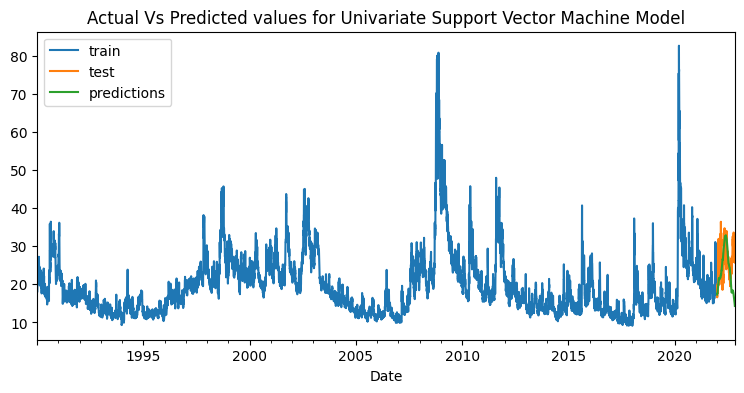

In [46]:
fig, ax = plt.subplots(figsize=(9, 4))
train['VIX_Close'].plot(ax=ax, label='train')
test['VIX_Close'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
plt.title("Actual Vs Predicted values for Univariate Support Vector Machine Model")
ax.legend();

##### Calculating RMSE for predictions across actual

In [47]:
svr_uni_rmse = np.sqrt(mean_squared_error(
                y_true = test['VIX_Close'],
                y_pred = predictions
            ))

print(f"Univariate SVR Test error (rmse): {svr_uni_rmse}")

Univariate SVR Test error (rmse): 6.7433185899869885


#### c) Multivariate Modeling  CHECK THE SHIFTING PART

For multivariate modeling, we will create a new column which is the lage of the *VIX_Close*. That's because we want to check the effect of yesterday's features on today's values and see wether it will have any effect.

**1. Multivariate Time Series Using Random Forest**

In [48]:
multi_df = new_df.copy()
multi_df['multi_VIX'] = multi_df['VIX_Close'].shift(-1)
multi_train = multi_df.loc['1990-01-03':'2021-12-31'] 
multi_test = multi_df.loc['2022-01-01':'2022-11-01'] 

##### Create and train forecaster for multivariate time series using Random Forest Regressor

In [49]:
rf_multi = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 365
             )

rf_multi.fit(y=multi_train['multi_VIX'], exog=multi_train.drop(columns=['Date','multi_VIX']))
rf_multi

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 22

##### Calculating Predictions

In [50]:
predictions = rf_multi.predict(steps=len(multi_test), exog=multi_test.drop(columns=['Date','multi_VIX']))
predictions.head()

2022-01-01    17.2687
2022-01-02    17.4450
2022-01-03    16.9623
2022-01-04    16.6596
2022-01-05    19.3381
Freq: D, Name: pred, dtype: float64

##### Plotting Actual Vs Predicted

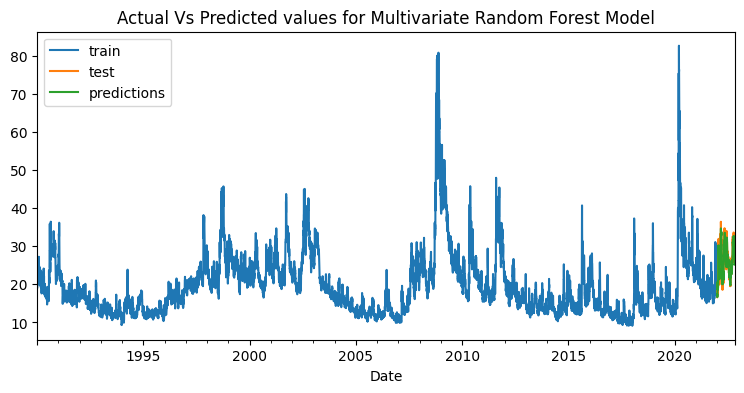

In [51]:
fig, ax = plt.subplots(figsize=(9, 4))
multi_train['multi_VIX'].plot(ax=ax, label='train')
multi_test['multi_VIX'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
plt.title("Actual Vs Predicted values for Multivariate Random Forest Model")
ax.legend();

##### Calculating RMSE for predictions across actual

In [52]:
rf_multi_rmse = np.sqrt(mean_squared_error(
                y_true = multi_test['multi_VIX'],
                y_pred = predictions
            ))

print(f"Multivariate Random Forest Test error (rmse): {rf_multi_rmse}")

Multivariate Random Forest Test error (rmse): 1.7630722534856702


##### Checking Feature Importance

In [53]:
feat_imp = rf_multi.get_feature_importance()
feat_imp = feat_imp.sort_values('importance',ascending=False)
feat_imp[:12]

,feature,importance
365,VIX_Close,0.501688
0,lag_1,0.466117
1,lag_2,0.003457
2,lag_3,0.001706
173,lag_174,0.000394
378,dayofweek,0.000329
13,lag_14,0.000310
419,VKOSPI_Close_prev_week_std,0.000280
7,lag_8,0.000272
395,Dollar_Close_prev_week_std,0.000267


##### Observations from Feature Importance:
- We can see that the highes important values are first lags. Regarding the extracted features, we can see that, aside from the lag features, the **day of week**, **VKOSPI_Close_prev_week_std**, **Dollar_Close_prev_week_std** have high importance

**2. Multivariate Time Series Using Support Vector Machines**

##### Create and train forecaster for multivariate time series using Support Vector Regressor

In [54]:
svr_multi = ForecasterAutoreg(
                regressor = SVR(),
                lags      = 365
             )

svr_multi.fit(y=multi_train['multi_VIX'], exog=multi_train.drop(columns=['Date','multi_VIX']))
svr_multi

ForecasterAutoreg 
Regressor: SVR() 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

##### Calculating Predictions

In [55]:
predictions = svr_multi.predict(steps=len(multi_test), exog=multi_test.drop(columns=['Date','multi_VIX']))
predictions.head()

2022-01-01    18.579189
2022-01-02    18.586358
2022-01-03    18.618511
2022-01-04    18.633532
2022-01-05    18.816619
Freq: D, Name: pred, dtype: float64

##### Plotting Actual Vs Predicted

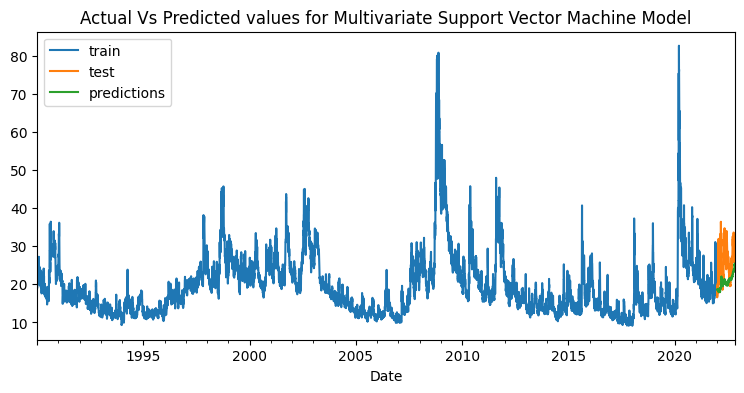

In [56]:
fig, ax = plt.subplots(figsize=(9, 4))
multi_train['multi_VIX'].plot(ax=ax, label='train')
multi_test['multi_VIX'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
plt.title("Actual Vs Predicted values for Multivariate Support Vector Machine Model")
ax.legend();

##### Calculating RMSE for predictions across actual

In [57]:
svr_multi_rmse = np.sqrt(mean_squared_error(
                y_true = multi_test['multi_VIX'],
                y_pred = predictions
            ))

print(f"Multivariate SVR Test error (rmse): {svr_multi_rmse}")

Multivariate SVR Test error (rmse): 6.82933292656423


#### Concatenating Machine Learning Models Results

In [58]:
results = pd.DataFrame(columns=['Univariate','Multivariate'],index=['Random Forest','SVR'])
results.loc['Random Forest','Univariate'] = round(rf_uni_rmse,3)
results.loc['Random Forest','Multivariate'] = round(rf_multi_rmse,3)
results.loc['SVR','Univariate'] = round(svr_uni_rmse,3)
results.loc['SVR','Multivariate'] = round(svr_multi_rmse,3)

In [59]:
results

,Univariate,Multivariate
Random Forest,10.704,1.763
SVR,6.743,6.829


#### Observations based on Machine Learning Models Results:

We can see that the multivariate Random Forest model is the best performing model. We will compare it to our baseline model, which is basically using the previous day's values as today's volatility values.

#### Baseline Model

Checking the root mean squared error of the baseline model.

In [76]:
best_model_rmse = np.sqrt(mean_squared_error(
                y_true = multi_test['multi_VIX'],
                y_pred = multi_test['VIX_Close']
            ))

print(f"Baseline Model Test error (rmse): {best_model_rmse}")

Baseline Model Test error (rmse): 1.5330088233198962


##### Plotting Actual Vs Predicted

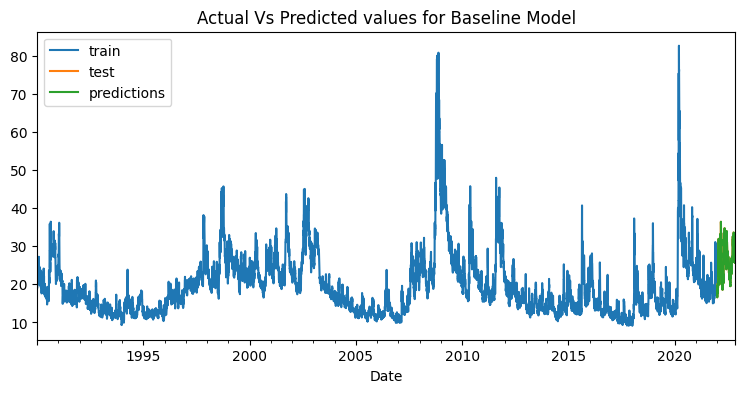

In [62]:
fig, ax = plt.subplots(figsize=(9, 4))
multi_train['multi_VIX'].plot(ax=ax, label='train')
multi_test['multi_VIX'].plot(ax=ax, label='test')
multi_test['VIX_Close'].plot(ax=ax, label='predictions')
plt.title("Actual Vs Predicted values for Baseline Model")
ax.legend();

#### Observations based on Baseline model RMSE:
- We can see that although using many features help in producing low RMSE, however, it's still higher than the baseline model, which only uses the previous day's value without any additional features.

#### ARCH and GARCH models

We use the ARCH and GARCH volatility models. However, in this case, we will be using as an input to the models the S&P 500 returns (**GSPC**), which is basically calculated by getting the daily percent change. By inputting the S&P 500's returns in the ARCH and GARCH models, we are predicting it's volatility, which means predicting the VIX index.

When using the ARCH and GARCH models, we evaluate their performance by comparing the root of the predicted forecasts variances to the realized volatility calculated using the five-days rolling standard deviation of returns.

For each model, we initiate its parameters using a quick gird search to find the lowest BIC metric; which basically an evaluation metric for time series data that compares the models performance to the number of parameters it has, and gives a penalty to the model when adding more parameters. Its objective is to find the most **parsimonious** model; menaing the best performing model with the *smallest number of parameters*.

More information about the ARCH and GARCH models can be found in our report and in their documentation link found in the sources section.

In [63]:
returns = 100 * new_df.GSPC_Close.pct_change().dropna()
realized_vol = returns.rolling(5).std()

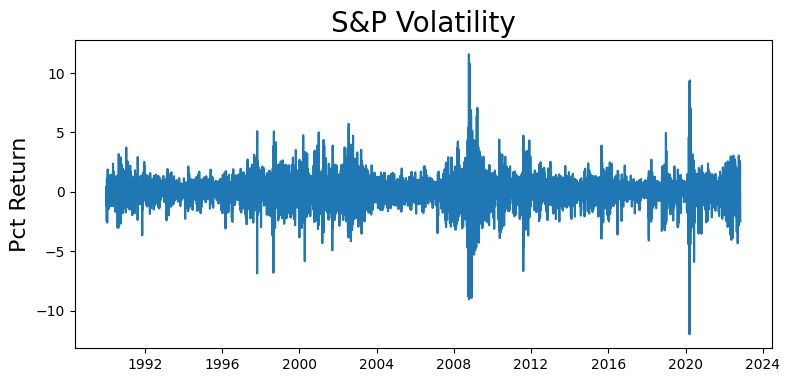

In [64]:
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('S&P Volatility', fontsize=20);

##### Grid search to find the best parameters using minimum BIC (Bayesian information criterion)

In [65]:
# arch_model has 3 parameters p,q where p is the number of previous values 
# and q is the previous volatality
# For ARCH p is variable and q = 0
bic_arch = []
for p in range(1, 5):
    arch = arch_model(returns, vol='ARCH', p=p, o=0)\
                .fit(last_obs="2021-12-31",disp='off')
    bic_arch.append(arch.bic)
    if arch.bic == np.min(bic_arch):
        best_param = p

arch = arch_model(returns, vol='ARCH', p=best_param, o=0)\
        .fit(last_obs="2021-12-31",disp='off')

print('Best Parameters (p):',best_param)
print(arch.summary())

Best Parameters (p): 4
                      Constant Mean - ARCH Model Results                      
Dep. Variable:             GSPC_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -14502.1
Distribution:                  Normal   AIC:                           29016.3
Method:            Maximum Likelihood   BIC:                           29060.5
                                        No. Observations:                11685
Date:                Mon, Dec 12 2022   Df Residuals:                    11684
Time:                        20:45:05   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0464  8.196e-03   

##### Observations on the ARCH model:
- We can see that the best p parameter for ARCH model is 4. We can also see that all four parameters have high significance in predicting the volatility (low p-values).

##### Forecasting using ARCH model for dates starting after the last_obs parameters in the fit method

In [66]:
forecast = arch.forecast()
forecast_arch = forecast

##### Calculating RMSE for predictions across actual

In [67]:
from sklearn.metrics import mean_squared_error as mse
rmse_arch = np.sqrt(mse(realized_vol.iloc[-len(test):],np.sqrt(forecast_arch.variance.iloc[-len(test):] 
                         )))
print('The RMSE value of ARCH model is {:.4f}'.format(rmse_arch))

The RMSE value of ARCH model is 0.3244


##### Plotting Actual Vs Predicted

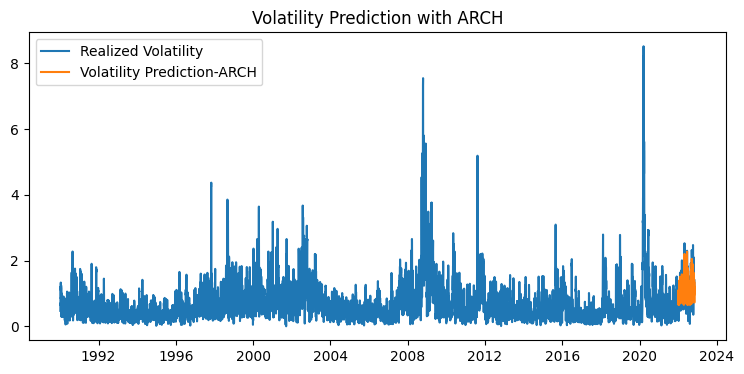

In [68]:
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(realized_vol, label='Realized Volatility')
plt.plot(np.sqrt(forecast_arch.variance.iloc[-len(test):]) , 
         label='Volatility Prediction-ARCH')
plt.title('Volatility Prediction with ARCH', fontsize=12)
plt.legend()
plt.show()

##### Predicting next 7 days

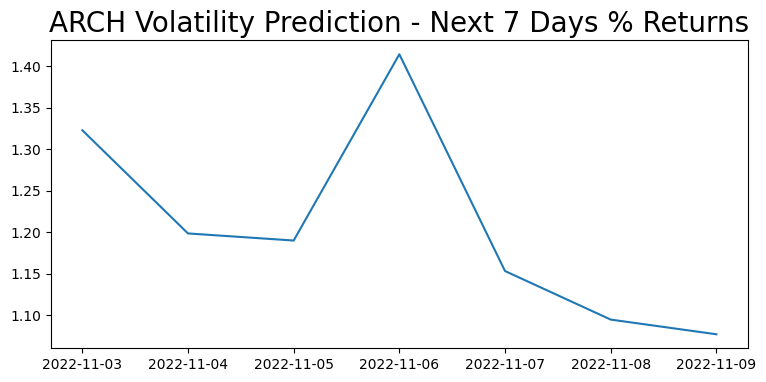

In [70]:
from datetime import datetime, timedelta
pred = arch.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(pred)
plt.title('ARCH Volatility Prediction - Next 7 Days % Returns', fontsize=20);

## Garch Model

##### Grid search to the best parameter

In [71]:
# arch_model has 3 parameters p,q where p is the number of previous values 
# and q is the previous volatality
# For GARCH both p and q are variable
bic_garch = []
for p in range(1, 5):
    for q in range(1, 5):
        garch = arch_model(returns, vol='GARCH', p=p, o=0, q=q)\
                .fit(last_obs="2021-12-31",disp='off')
        bic_garch.append(garch.bic)
        if garch.bic == np.min(bic_garch):
            best_param = p, q
        
garch = arch_model(returns, vol='GARCH', p=best_param[0], o=0, q=best_param[1])\
        .fit(last_obs="2021-12-31",disp='off')

print('Best Parameters (p,q):',best_param)
print(garch.summary())


Best Parameters (p,q): (4, 4)
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             GSPC_Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13274.1
Distribution:                  Normal   AIC:                           26568.1
Method:            Maximum Likelihood   BIC:                           26641.8
                                        No. Observations:                11685
Date:                Mon, Dec 12 2022   Df Residuals:                    11684
Time:                        20:45:34   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0427  6.289

##### Observations on the GARCH model:
- We can see that the best p and q parameters for the GARCH model is are (4,4). We can also see that not all the eight values are significant (especially beta[1] and [2] which are related to previous volatality). Only five out of the eight parameters are significant.

##### Forecasting using GARCH model for dates starting after the last_obs parameters in the fit method

In [72]:
forecast = garch.forecast()
forecast_garch = forecast

##### Calculating RMSE for predictions across actual

In [73]:
from sklearn.metrics import mean_squared_error as mse
rmse_garch = np.sqrt(mse(realized_vol.iloc[-len(test):],np.sqrt(forecast_garch.variance.iloc[-len(test):] 
                         )))
print('The RMSE value of GARCH model is {:.4f}'.format(rmse_garch))

The RMSE value of GARCH model is 0.3911


##### Plotting Actual Vs Predicted

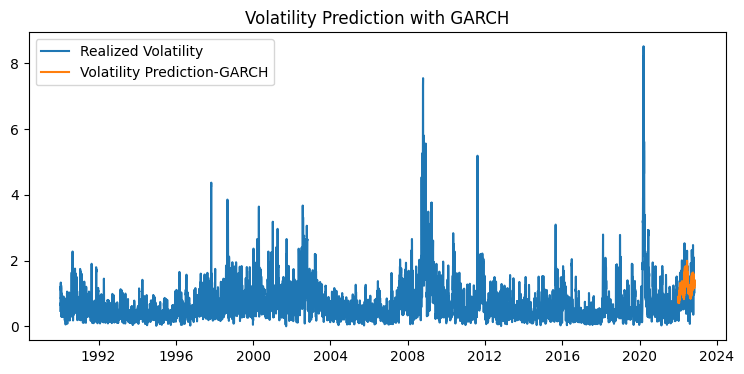

In [74]:
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(realized_vol, label='Realized Volatility')
plt.plot(np.sqrt(forecast_garch.variance.iloc[-len(test):]) , 
         label='Volatility Prediction-GARCH')
plt.title('Volatility Prediction with GARCH', fontsize=12)
plt.legend()
plt.show()

##### Predicting next 7 days

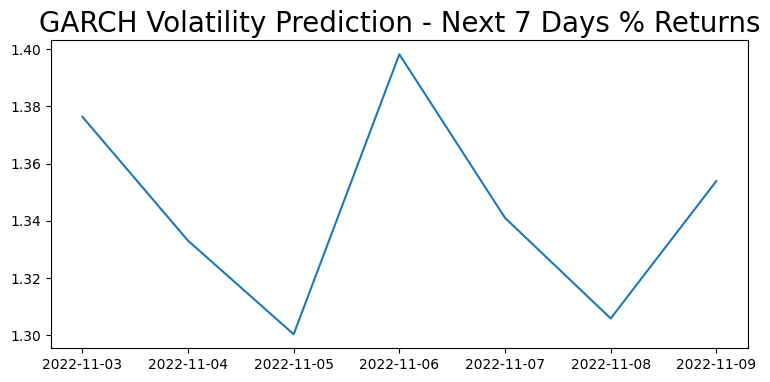

In [75]:
from datetime import datetime, timedelta
pred = garch.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)
fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(pred)
plt.title('GARCH Volatility Prediction - Next 7 Days % Returns', fontsize=20);

##### Observations based on ARCH and GARCH models:
- We can see that RMSE values for ARCH and GARCH models are very similar, with ARCH model haveing a lower RMSE. On the other hand, comparing the BIC(Bayesian information criterion) metric across the two models, GARCH model has a lower BIC however, 3 out of the chosen parameters aren't significant enough. Comparing to the ARCH model, it may have a higher BIC, but all the chosen parameters are significant. This may mean that the current GARCH variation has very little additional predictive power over ARCH which is just AutoRegressive using previous values.

##### Code sources
https://github.com/ritvikmath/Time-Series-Analysis/blob/master/GARCH%20Stock%20Modeling.ipynb
https://learning.oreilly.com/library/view/machine-learning-for/9781492085249/ch04.html

### 7. Conclusion & Future Work

Based on our analysis we can conclude that:
- Although adding features might help in having accurate volatility predictions using Machine Learning models, it's still not reaching better results than using the previous day's value. This might be due to the fact that the chosen set of features wasn't relevant enough. For future work, other features can be used in the analysis.

- ARCH and GARCH models produce accurate predictions, with the ARCH model being prefered having less number of parameters. 

- We can't compare RMSE from Machine Learning models to the Volatility models since the models nature and their initialization are different. 

Future work can include:
- More feature engineering; feature selection from our set of features to the top important ones and comparing the results. 

- Hyperparameter tuning for Machine Learning Models.

- Using other econcomic /  financial related features that might have higher impact on volatility prediction.

- Adding Exogenous Variables related to other economic indicators including sentiment to the ARCH and GARCH models and compare their performance.